In [43]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
#Les csv fil
file_out = pd.read_csv('day_length_weight.csv')
trainingSet = torch.Tensor(file_out.values)
length = torch.reshape(torch.Tensor(trainingSet[:,1]), (-1,1))
weight = torch.reshape(torch.Tensor(trainingSet[:,2]), (-1,1))
days = torch.reshape(torch.Tensor(trainingSet[:,0]), (-1,1))

In [45]:
class Model:
    def __init__(self):
        self.W1 = torch.tensor([[0.0]], requires_grad=True)
        self.W2 = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self,x1,x2):
        return (x1 @ self.W1) + (x2 @self.W2) + self.b

    def loss(self, x1,x2,y):
        return(torch.nn.functional.mse_loss(self.f(x1,x2),y))


model = Model()

In [46]:

optimizer = torch.optim.SGD([model.W1,model.W2,model.b], 0.0001)
for epoch in range(100000):
    loss = model.loss(length, weight,days)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

W1 = tensor([[-2.4286]], requires_grad=True), W2 = tensor([[96.4417]], requires_grad=True), b = tensor([[-73.9842]], requires_grad=True), loss = 86033.78125


C:\Users\Morten\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
C:\Users\Morten\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


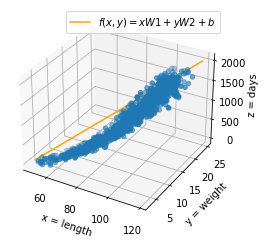

In [47]:
#Fix til 3d

print(f"W1 = {model.W1}, W2 = {model.W2}, b = {model.b}, loss = {model.loss(length, weight, days)}")

#plot
ax = plt.axes(projection="3d")
ax.set_xlabel('x = length')
ax.set_ylabel('y = weight')
ax.set_zlabel('z = days')

length_interval = torch.tensor([[length.min()], [length.max()]])
weight_interval = torch.tensor([[weight.min()], [weight.max()]])

ax.scatter(length.flatten(), weight.flatten(), days.flatten())
ax.plot(length_interval.flatten(), weight_interval.flatten(), model.f(length_interval, weight_interval).detach().flatten(), color='orange', label='$f(x,y)=xW1+yW2+b$')

plt.legend()
plt.show()